GroupGal : 83093
EnvMeasures : 67996
EnvMeasures : 56228
visualMorph : 38795
['CATAID', 'ELLIPTICAL', 'ELLIPTICAL_CODE', 'HUBBLE_TYPE_SPD', 'HUBBLE_TYPE_SPD_CODE', 'HUBBLE_TYPE_LSK', 'HUBBLE_TYPE_LSK_CODE', 'HUBBLE_TYPE_ASGR', 'HUBBLE_TYPE_ASGR_CODE', 'HUBBLE_TYPE', 'HUBBLE_TYPE_CODE', 'ASGR_DISTURBED', 'ASGR_NORMAL', 'ASGR_UNSURE', 'ASGR_CLASSIFIERS', 'ASGR_PROBDIST', 'P_EL', 'P_CS', 'P_EL_DEBIASED', 'P_CS_DEBIASED', 'URL_IMG']
Joining envMeasures VisualMorph 8932
8932
['CATAID', 'RA', 'Dec', 'Z', 'Rpetro', 'DM_100_25_75', 'SURVEY_CODE', 'SigErr', 'GroupID', 'RankIterCen', 'SepIterCen', 'CoSepIterCen', 'AngSepIterCen', 'RankBCG', 'SepBCG', 'CoSepBCG', 'AngSepBCG', 'RankCen', 'SepCen', 'CoSepCen', 'AngSepCen', 'ELLIPTICAL', 'ELLIPTICAL_CODE', 'HUBBLE_TYPE_SPD', 'HUBBLE_TYPE_SPD_CODE', 'HUBBLE_TYPE_LSK', 'HUBBLE_TYPE_LSK_CODE', 'HUBBLE_TYPE_ASGR', 'HUBBLE_TYPE_ASGR_CODE', 'HUBBLE_TYPE', 'HUBBLE_TYPE_CODE', 'ASGR_DISTURBED', 'ASGR_NORMAL', 'ASGR_UNSURE', 'ASGR_CLASSIFIERS', 'ASGR_PROBDIS

/var/folders/cj/z259fmwd41dgzl8mq8nppwd40000gn/T/ipykernel_13842/1552951553.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bin'] = pd.cut(df2['CoSepIterCen'], 5)


TypeError: unsupported operand type(s) for -: 'pandas._libs.interval.Interval' and 'pandas._libs.interval.Interval'

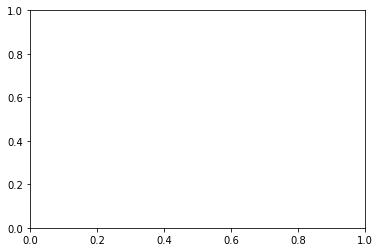

In [3]:
from astropy.table import Table, join
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd
import statistics as st

#ForGroup = Table.read('../../GAMA_DATA/G3CFoFGroupv10.fits')
#print(f"ForGroup : {len(ForGroup)}")
## Clean Data

GroupGal = Table.read('../../GAMA_DATA/G3CGalv10.fits')
# Clean data
GroupGal = GroupGal[GroupGal['GroupID'] > 0 ]
print(f"GroupGal : {len(GroupGal)}")

envMeasures = Table.read('../../GAMA_DATA/EnvironmentMeasuresv05.fits')
print(f"EnvMeasures : {len(envMeasures)}")
# Clean Data
envMeasures = envMeasures[envMeasures['SurfaceDensity'] < 50]
envMeasures = envMeasures[envMeasures['AGEDenParFlag'] == 0]
envMeasures = envMeasures[envMeasures['CountInCylFlag'] == 0]
print(f"EnvMeasures : {len(envMeasures)}")

#envClass = Table.read('../../GAMA_DATA/GalaxiesClassifiedv01.fits')
# Clean Data

visualMorph = Table.read('../../GAMA_Data/VisualMorphologyv03.fits')
print(f"visualMorph : {len(visualMorph)}")
print(visualMorph.colnames)
## Clean Data
#visualMorphElliptical = visualMorph[visualMorph['ELLIPTICAL_CODE'] == 1]
#visualMorphSpiral = visualMorph[visualMorph['ELLIPTICAL_CODE'] == 10]
visualMorph = visualMorph[visualMorph['ELLIPTICAL_CODE'] != 0]
visualMorph = visualMorph[visualMorph['ELLIPTICAL_CODE'] < 50]

RErange = join(GroupGal,visualMorph,keys='CATAID',join_type='inner')
print('Joining envMeasures VisualMorph '+str(len(RErange)))
print(len(RErange))
print(RErange.colnames)

alphaVal = .3
binCount = 100

#df2 = (df["ELLIPTICAL"] == '1') + (df["ELLIPTICAL"] == '11') + (df["ELLIPTICAL"] == '12')
#df2.columns=["E","S0-Sa","Sb0-SBa"]
#print(df2)


#xfields = ['CoSepIterCen','CoSepBCG','CoSepCen']
xfields = ['CoSepIterCen']

#for i,xfield in enumerate(xfields,1) :
#     sns.set(rc={'figure.figsize':(10,8)})
#     df = RErange.to_pandas()
#     df["bin"] = pd.cut(df[xfield], 5)
#     df["Counts"] = df.value_counts('ELLIPTICAL_CODE')   
#     sns.barplot(x="bin", y="Counts",data=df)
#     sns.histplot(x="bin",y="ELLIPTICAL_CODE"),data=df,multipl='stack')
#  plt.show()
    

df = RErange.to_pandas()    
#xfield = ['CoSepIterCen']
df2 = df[['ELLIPTICAL_CODE','CoSepIterCen']]
df2['bin'] = pd.cut(df2['CoSepIterCen'], 5)
df3 = df2.groupby(['bin','ELLIPTICAL_CODE']).size().reset_index(name='Counts')
df4=df3.set_index(['bin','ELLIPTICAL_CODE'])
print(df4)
#df4=df3.set_index(['bin'])
sns.histplot(df4, x='bin', hue='ELLIPTICAL_CODE', weights='Counts',
             multiple='stack', palette='tab20c', shrink=0.8)
#sns.barplot(x=("bin","ELLIPTICAL_CODE"), y="Counts",data=df4)
#ax2=df4[["bin", "ELLIPTICAL_CODE"]].plot(kind="bar", stacked=True)

df4.plot.bar(stacked=True)
#sns.barplot(x="bin", y="Counts",data=df3)
#df3.T.plot.bar(stacked=True, figsize=(12,6))
#sns.histplot(df3, x='bin', hue='ELLIPTICAL_CODE', weights='Counts',
#             multiple='stack', palette='tab20c', shrink=0.8)
#print(df2)
print(df4)
print(f'df4 index :{df4.index}')
#df4.plot.bar(x="bin", y="Counts")
#sns.histplot(x="bin", y="ELLIPTICAL_CODE",weights="Counts",data=df3)
#df4.plot.bar(x="bin", y="Counts",stacked=True,rot=0)
#df4.plot(kind='bar',x="bin", y="Counts",stacked=True,rot=0)


#for i,xfield in enumerate(xfields,1) :
#     sns.set(rc={'figure.figsize':(10,8)})
#     df = RErange.to_pandas()
#     df["bin"] = pd.cut(df[xfield], 5)
#     sns.barplot(x="bin", y="ELLIPTICAL_CODE",data=df)
#     sns.histplot(x="bin",y="ELLIPTICAL_CODE"),data=df,multipl='stack')
#     plt.show()



#for i,xfield in enumerate(xfields,1) :
#    df = RErange.to_pandas()
#    #print(pd.cut(df[xfield],8))
#    print(df['ELLIPTICAL_CODE'])


